SampleDB(sample_ids=['20210907_RM0012_5dpf_fP3_f1', '20210907_RM0012_5dpf_fP10_f2', '20211005_RM0012_128hpf_fP13_f1', '20220117_RM0012_128hpf_fP16_f2', '20220118_RM0012_123hpf_fP14_f1', '20220118_RM0012_124hpf_fP8_f2', '20220214_RM0012_fP14_130hpf_f3', '20220414_RM0012_128hpf_fP8_f1', '20220420_RM0012_121hpf_fP11_f1', '20220420_RM0012_123hpf_fP11_f2', '20220420_RM0012_124hpf_fP8_f3', '20220426_RM0012_124hpf_fP21_f1', '20220426_RM0012_128hpf_fP14_f2', '20220426_RM0008_130hpf_fP1_f3', '20220426_RM0008_132hpf_fP1_f4', '20220427_RM0008_126hpf_fP3_f3', '20220427_RM0012_129hpf_fP16_f4', '20220503_RM0008_122hpf_fP2_f1', '20220503_RM0008_123hpf_fP3_f2', '20220503_RM0008_127hpf_fP2_f3', '20220503_RM0008_130hpf_fP2_f4', '20220504_RM0008_124hpf_fP6_f1', '20220504_RM0008_124hpf_fP6_f2', '20220510_RM0008_128hpf_fP2_f1', '20220510_RM0008_129hpf_fP2_f2', '20220511_RM0008_123hpf_fP8_f1', '20220511_RM0008_126hpf_fP10_f2', '20220511_RM0008_128hpf_fP3_f3', '20220517_RM0008_123hpf_fP11_f1', '20220517_RM00

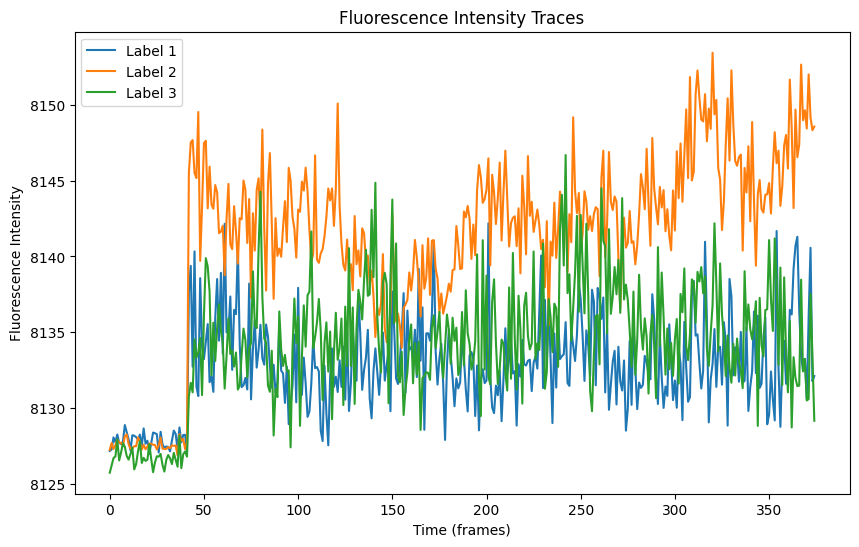

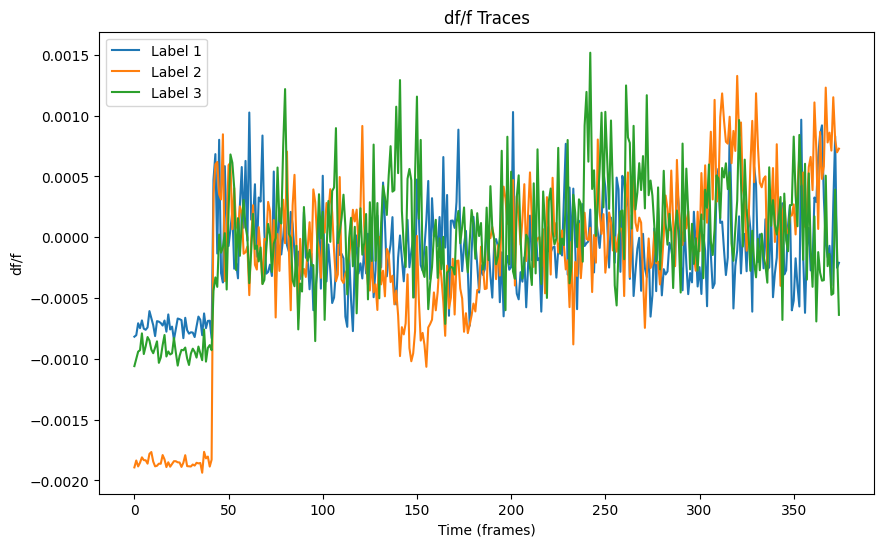

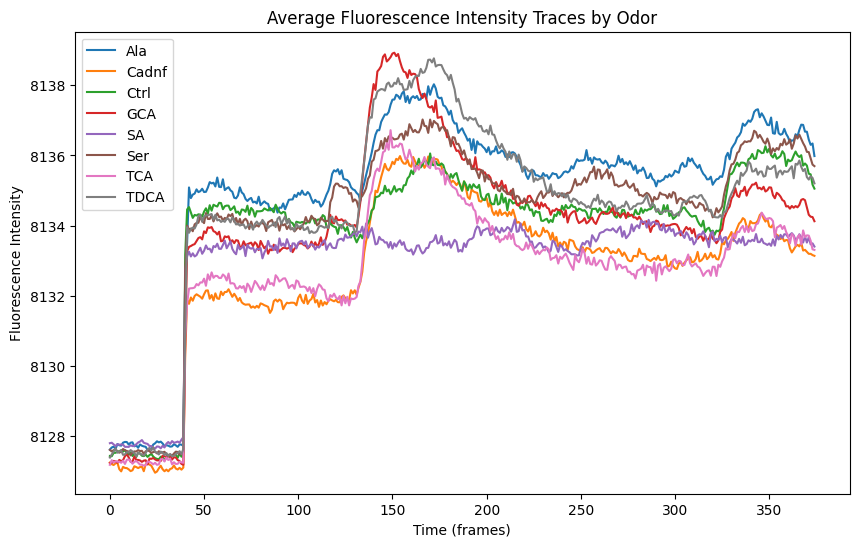

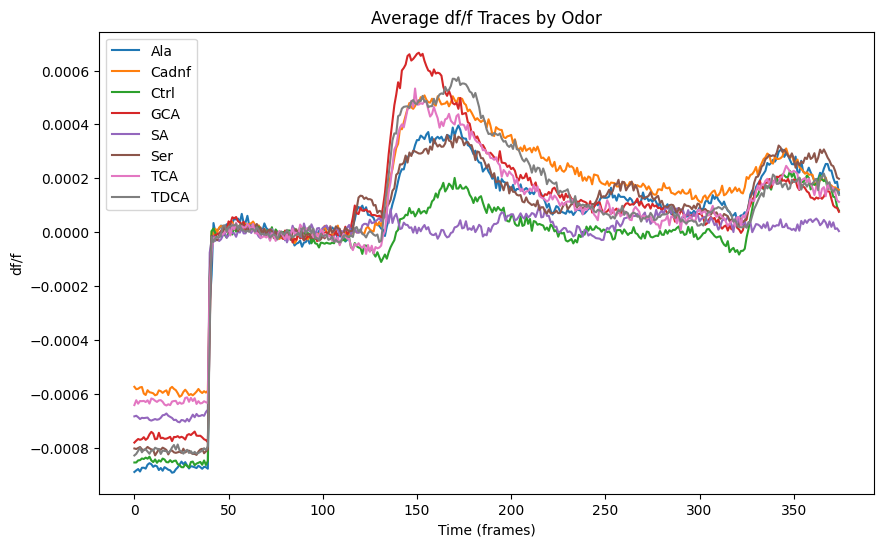

In [1]:
import os
import h5py
from scripts.sample_db import SampleDB

from scripts.utils.traces_utils import load_hdf5_data,  calculate_dff, plot_traces,plot_average_traces_by_group


# Load the sample database
db_path = r'\\tungsten-nas.fmi.ch\tungsten\scratch\gfriedri\montruth\sample_db.csv'
sample_db = SampleDB()
sample_db.load(db_path)
print(sample_db)

# Loading experiment
sample_id = '20210907_RM0012_5dpf_fP3_f1'  
exp = sample_db.get_sample(sample_id)
print(exp.sample.id)

# Making shortcuts of sample parameters/information
sample = exp.sample
trials_path = exp.paths.trials_path
n_planes = exp.params_lm.n_planes
n_trials = exp.params_lm.n_trials
doubling = 2 if exp.params_lm.doubling else 1

# Getting paths of the trial acquisitions
trial_names = os.listdir(os.path.join(trials_path, 'raw'))
processed_folder = os.path.join(trials_path, 'processed')
masks_folder = os.path.join(trials_path, "masks")


# Create folder for saving fluorescence data
traces_folder = os.path.join(trials_path, "traces")
os.makedirs(traces_folder, exist_ok=True)

hdf5_file_path = os.path.join(traces_folder, f'{exp.sample.id}_fluorescence_data.h5')

data = load_hdf5_data(hdf5_file_path, exp.sample.id)

# Calculate df/f traces
dff_traces = calculate_dff(data['raw_traces'], baseline_frames=[50,100])

# Plot example raw traces
plot_traces(data['raw_traces'], data['lm_plane_labels'], 'Fluorescence Intensity Traces', 'Fluorescence Intensity')

# Plot example df/f traces
plot_traces(dff_traces, data['lm_plane_labels'], 'df/f Traces', 'df/f')

# Save df/f traces to HDF5 file
with h5py.File(hdf5_file_path, 'r+') as f:
    exp_grp = f[sample_id]
    if 'dff_traces' in exp_grp:
        del exp_grp['dff_traces']
    exp_grp.create_dataset('dff_traces', data=dff_traces)

print("df/f traces calculated and saved in HDF5 file.")

# Plot average raw traces for each odor
plot_average_traces_by_group(data['raw_traces'], data['odor'], 'Average Fluorescence Intensity Traces by Odor', 'Fluorescence Intensity')

# Plot average df/f traces for each odor
plot_average_traces_by_group(dff_traces, data['odor'], 'Average df/f Traces by Odor', 'df/f')


In [30]:
traces.shape
shutter_closed_value = np.mean(traces[:,0:10], axis=1)
print(shutter_closed_value)

[8127.8804 8127.693  8126.8843 ... 8128.046  8128.3584 8126.1826]


In [31]:
def calculate_dff(traces, baseline_frames=[50,100]):
    shutter_closed_value = np.mean(traces[:,0:10], axis=1)
    print(shutter_closed_value)
    if shutter_closed_value is not None:
        traces_adjusted = traces - shutter_closed_value
    else:
        traces_adjusted = traces
    
    f0 = np.mean(traces_adjusted[:, baseline_frames[0]:baseline_frames[1]], axis=1)
    dff = (traces_adjusted - f0[:, np.newaxis]) / f0[:, np.newaxis]
    return dff



In [32]:
dff_traces_adjusted = calculate_dff(traces, baseline_frames=[50,100])

[8127.8804 8127.693  8126.8843 ... 8128.046  8128.3584 8126.1826]


ValueError: operands could not be broadcast together with shapes (41130,375) (41130,) 

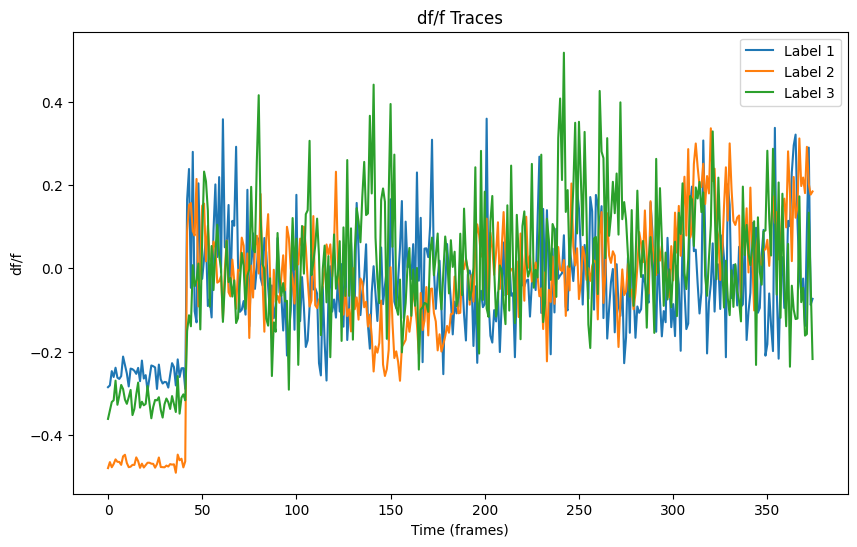

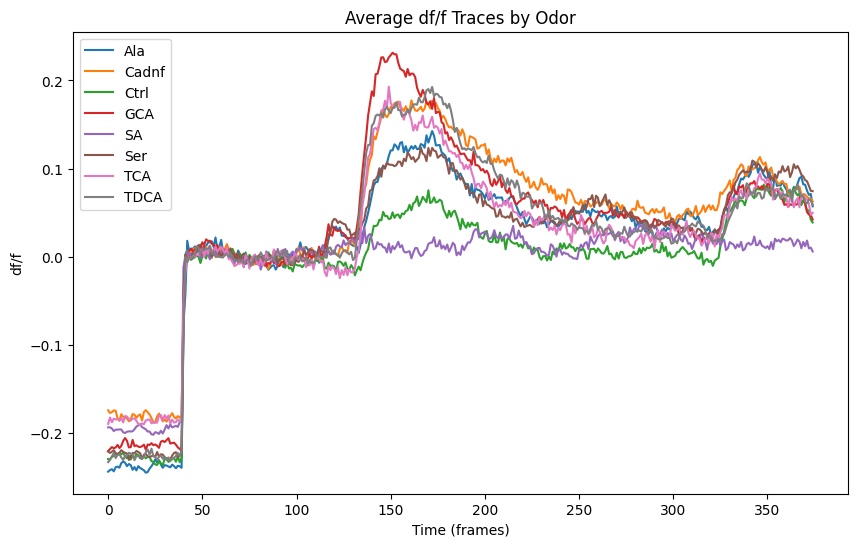

In [21]:
# Plot example df/f traces
plot_traces(dff_traces_adjusted, data['lm_plane_labels'], 'df/f Traces', 'df/f')

# Plot average df/f traces for each odor
plot_average_traces_by_group(dff_traces_adjusted, data['odor'], 'Average df/f Traces by Odor', 'df/f')

